# Ejercicio sobre RNC

**Desarrollado por:** Orlando Patricio Chacón Molina

**Fecha de creación:** 2022-03-20

**Fecha de actualización:** 2022-03-21

El conjunto de datos de moda MNIST es otro conjunto popular para la evaluación de modelos de visión computarizada. Consiste de 60,000 imágenes de entrenamiento, cada una es una imagen en escala de grises de 28x28, proveniente de 1 de 10 clases:

0. Polera/top
1. Pantalón
2. Suéter
3. Vestido
4. Abrigo
5. Sandalia
6. Camisa
7. Zapatilla
8. Bolso
9. Botín

Tu tarea es usar una RNC para clasificar las imágenes como uno de los 10 artículos de vestimenta. Puedes descargar los datos desde Kaggle. Trata de construir el mejor modelo posible (que tenga la mayor precisión en los datos de prueba).

In [ ]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

## Leer conjuntos de datos

In [2]:
dataTrain = pd.read_csv('data/fashion-mninst/fashion-mnist_train.csv') # Conjunto de entrenamiento
dataTest = pd.read_csv('data/fashion-mninst/fashion-mnist_test.csv')   # Conjunto de pruebas

In [3]:
dataTrain.head() # Mostrar los primeros 5 registros (train)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataTest.head() # Mostrar los primeros 5 registros (test)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Separar  variables predictoras y clases
# para entrenamiento y para pruebas.

X_train = dataTrain.iloc[:,1:].to_numpy()
y_train = dataTrain['label'].to_numpy()

X_test = dataTest.iloc[:,1:].to_numpy()
y_test = dataTest['label'].to_numpy()


In [6]:
# Escalar variables(Varible original entre 0 y 255)
# por lo tanto, para que los valores estén entre 0 y 1
# únicamente dividimos para 255.

X_train = X_train / 255
X_test = X_test / 255

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [10]:
# Forma de de la entrada de datos
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [11]:
model = Sequential()

In [12]:
# Capa convolucional
model.add(Conv2D(filters = 8, # Cantidad de filtros
                 kernel_size = 3, # Tamaño de cada filtro
                 input_shape = input_shape)) # Forma de la entrada de datos
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Tamaño de pooling
# Capa de aplanamiento
model.add(Flatten())
# Capa de salida
model.add(Dense(10, # Número de clases
                activation = 'softmax')) # Función de activación utilizada(softmax)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
# Paso 2: compilar
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [14]:
# Paso 3: ajustar nuestro modelo
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 92us/sample - loss: 0.5322 - acc: 0.8130 - val_loss: 0.4542 - val_acc: 0.8392
Epoch 2/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.4085 - acc: 0.8582 - val_loss: 0.3965 - val_acc: 0.8643
Epoch 3/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3751 - acc: 0.8696 - val_loss: 0.3687 - val_acc: 0.8711
Epoch 4/20
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3540 - acc: 0.8770 - val_loss: 0.3484 - val_acc: 0.8788
Epoch 5/20
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3373 - acc: 0.8823 - val_loss: 0.3499 - val_acc: 0.8826
Epoch 6/20
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3244 - acc: 0.8871 - val_loss: 0.3301 - val_acc: 0.8852
Epoch 7/20
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3122 - acc: 0.8897 - val_los

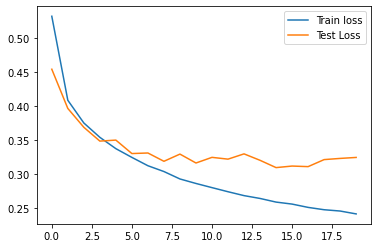

In [15]:
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

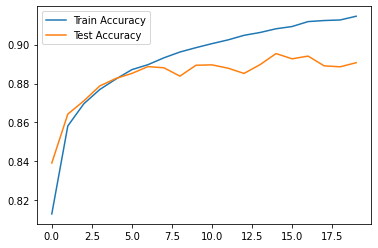

In [16]:
# Visualizar la precisión
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();